In [1]:
%pylab nbagg
import cma, como
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
dimension = 10
num_kernels = 1 # number of single-objective solvers (population size)

In [4]:
#list_of_solvers = como_restart.get_cmas(num_kernels * [dimension * [0]], 0.2) # produce `num_kernels cma instances`
list_of_solvers = como.get_cmas(np.random.rand(num_kernels, dimension), 0.2) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, opts = {'archive': True, 'restart': [-5, 5]}, reference_point = [11,11]) # create a como-cma-es instance

In [5]:
fitness = como.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#fitness = como.FitFun(lambda x: 1/len(x) * cma.ff.sphere(x), lambda x: 1/len(x) * cma.ff.sphere(x-1)) 
# a callable bi-objective function

In [8]:
moes.optimize(fitness, iterations=1400)

  500   5000 9.241145698101158e+01 1.8e+00 5.41e-06  8e-07  1e-06
  600   6000 9.241153155521832e+01 1.8e+00 5.25e-06  7e-07  1e-06
  700   7000 9.422557774537324e+01 2.0e+00 5.25e-06  7e-07  1e-06
  800   8000 9.422562712828001e+01 1.8e+00 5.08e-06  8e-07  1e-06
  900   9000 9.586253953510197e+01 2.0e+00 5.08e-06  8e-07  1e-06
 1000  10000 9.586428434904988e+01 2.0e+00 5.08e-06  8e-07  1e-06
 1100  11000 9.753193994158632e+01 2.0e+00 5.25e-06  8e-07  1e-06
 1200  12000 9.767837839454104e+01 2.1e+00 5.25e-06  8e-07  1e-06
 1300  13000 9.788524903541129e+01 2.1e+00 5.08e-06  8e-07  1e-06
 1400  14000 9.807661104989563e+01 2.2e+00 5.08e-06  8e-07  1e-06
 1500  15000 9.807661218324020e+01 2.1e+00 5.25e-06  7e-07  1e-06
 1600  16000 9.847470002437849e+01 2.4e+00 5.25e-06  7e-07  1e-06
 1700  17000 9.847484738292916e+01 2.4e+00 5.25e-06  7e-07  1e-06
 1800  18000 1.000158258532661e+02 2.2e+00 5.29e-06  8e-07  1e-06


In [ ]:
#while not moes.stop():
for i in range(6000):
    solutions = moes.ask("all")
    objective_values = [fitness(x) for x in solutions]
    moes.tell(solutions, objective_values)
    moes.disp()          # display datas during the optimization
    moes.logger.add()    # logging data after each `ask` and `tell` call


<IPython.core.display.Javascript object>


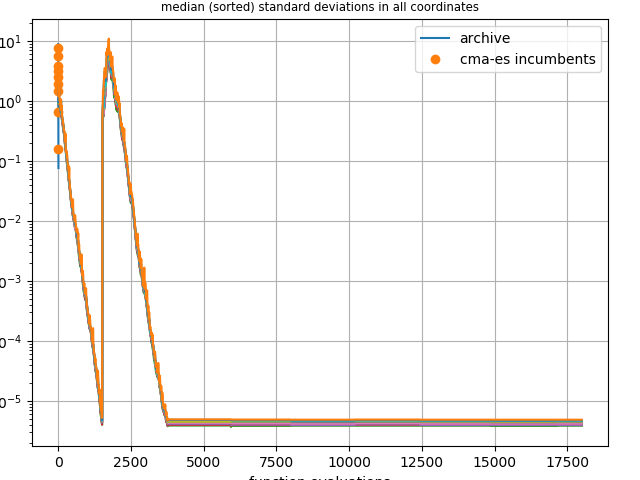

In [9]:
moes.logger.plot_front()

In [ ]:
figure()
moes.logger.plot_front()

<IPython.core.display.Javascript object>


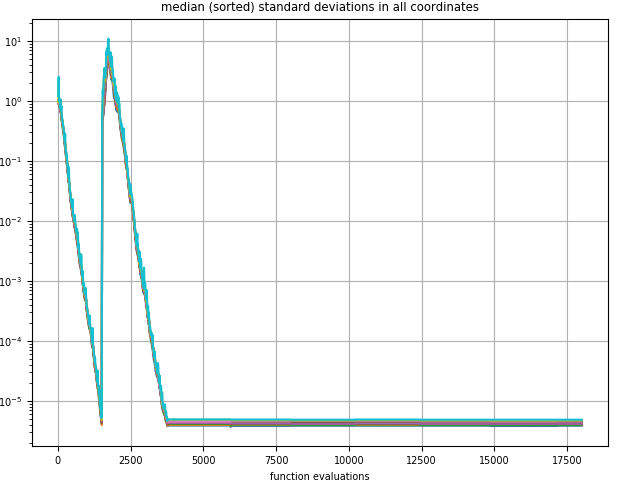

In [11]:
figure()
moes.logger.plot_stds()

In [ ]:
moes.num_kernels

In [ ]:
kernel = moes.kernels[0]

In [ ]:
kernel.opts['tolx']

In [12]:
import numpy as np

In [13]:
[1, 2] * np.array([3, 4])

array([3, 8])

In [14]:
np.array([3, 4]) * [1, 2]

array([3, 8])